In [20]:
!pip install nltk scikit-learn pandas

import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
df = pd.read_csv('fake_job_postings.csv')
df = df[['title', 'description', 'fraudulent']]
df = df.dropna()
df.head()


,title,description,fraudulent
0,Marketing Intern,"Food52, a fast-growing, James Beard Award-winn...",0
1,Customer Service - Cloud Video Production,Organised - Focused - Vibrant - Awesome!Do you...,0
2,Commissioning Machinery Assistant (CMA),"Our client, located in Houston, is actively se...",0
3,Account Executive - Washington DC,THE COMPANY: ESRI – Environmental Systems Rese...,0
4,Bill Review Manager,JOB TITLE: Itemization Review ManagerLOCATION:...,0


In [22]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = text.split()
    return ' '.join([word for word in words if word not in stop_words])

df['clean_text'] = df['title'] + ' ' + df['description']
df['clean_text'] = df['clean_text'].apply(clean_text)



In [23]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['fraudulent']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Accuracy: 0.9653243847874721
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3394
           1       0.95      0.34      0.50       182

    accuracy                           0.97      3576
   macro avg       0.96      0.67      0.74      3576
weighted avg       0.96      0.97      0.96      3576



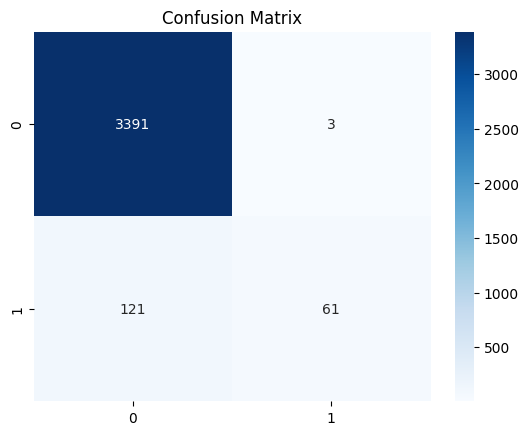

In [25]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [26]:
test_text = """We are hiring remote data entry operators. No experience needed. Quick money, flexible hours."""

def predict_fake(text):
    cleaned = clean_text(text)
    vec = vectorizer.transform([cleaned])
    return model.predict(vec)[0]

print("Prediction (1 = Fake, 0 = Real):", predict_fake(test_text))


Prediction (1 = Fake, 0 = Real): 1
